In [ ]:
Nguyễn Thái Bình - 19146050 - Nhóm 02CLC - 10_Fruit

In [70]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
from skimage import io
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [33]:
trainset='/content/drive/MyDrive/10_Fruit_data/train'
validationset='/content/drive/MyDrive/10_Fruit_data/validation'
train=ImageDataGenerator(rescale=1/255.0,validation_split=0)
validation=ImageDataGenerator(rescale=1/255.0,validation_split=0.9)

In [34]:
train_data=train.flow_from_directory(trainset,target_size=(150,150),batch_size=10,class_mode='categorical',subset="training",shuffle=True,)
validation_set=validation.flow_from_directory(validationset,target_size=(150,150),batch_size=10,class_mode='categorical',shuffle=True,subset="validation",)

Found 148 images belonging to 10 classes.
Found 84 images belonging to 10 classes.


In [35]:
print(train_data.class_indices)
print(validation_set.class_indices)

{'cam': 0, 'dao': 1, 'du_du': 2, 'dua_hau': 3, 'khe': 4, 'le': 5, 'man': 6, 'oi': 7, 'sapoche': 8, 'xoai': 9}
{'cam': 0, 'dao': 1, 'du_du': 2, 'dua_hau': 3, 'khe': 4, 'le': 5, 'man': 6, 'oi': 7, 'sapoche': 8, 'xoai': 9}


In [36]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

In [37]:
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [38]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
history=model.fit(train_data,batch_size=10,epochs=30,verbose=1,validation_data=validation_set)

Epoch 1/30
15/15 [==============================] - 73s 5s/step - loss: 5.2893 - accuracy: 0.0946 - val_loss: 2.2471 - val_accuracy: 0.2143
Epoch 2/30
15/15 [==============================] - 10s 660ms/step - loss: 2.2931 - accuracy: 0.1486 - val_loss: 2.1163 - val_accuracy: 0.2143
Epoch 3/30
15/15 [==============================] - 8s 565ms/step - loss: 2.3082 - accuracy: 0.2703 - val_loss: 1.9995 - val_accuracy: 0.1786
Epoch 4/30
15/15 [==============================] - 10s 705ms/step - loss: 1.9610 - accuracy: 0.2568 - val_loss: 2.8825 - val_accuracy: 0.2024
Epoch 5/30
15/15 [==============================] - 8s 544ms/step - loss: 1.8074 - accuracy: 0.4122 - val_loss: 1.4898 - val_accuracy: 0.5952
Epoch 6/30
15/15 [==============================] - 10s 681ms/step - loss: 1.0432 - accuracy: 0.6622 - val_loss: 1.0724 - val_accuracy: 0.7024
Epoch 7/30
15/15 [==============================] - 10s 651ms/step - loss: 0.8069 - accuracy: 0.7703 - val_loss: 1.9646 - val_accuracy: 0.5595
Epoc

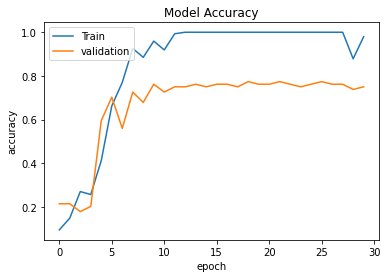

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [40]:
model.save('/content/drive/MyDrive/BT AI/10_Fruit.h5')

In [65]:
load_model('/content/drive/MyDrive/BT AI/10_Fruit.h5')

Found 22 images belonging to 1 classes.


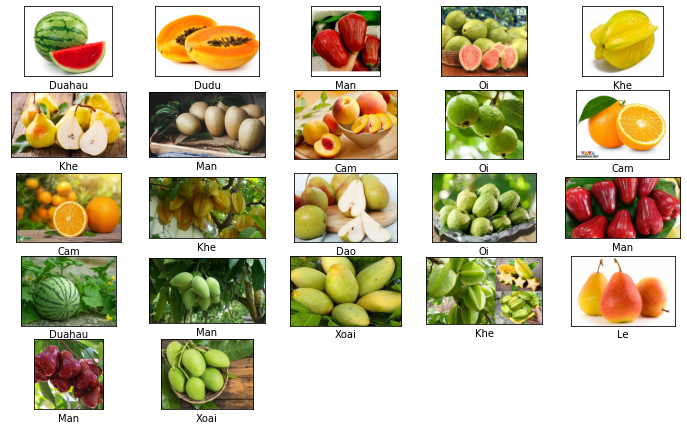

In [69]:
generator= ImageDataGenerator(rescale=1./255)
generator_data=generator.flow_from_directory('/content/drive/MyDrive/Test fruit',batch_size=5,shuffle=False,interpolation='lanczos')

fruit={0:'Cam',
      1:'Dao',
      2:'Dudu',
      3:'Duahau',
      4:'Khe',
      5:'Le',
      6:'Man',
      7:'Oi',
      8:'Sapoche',
      9:'Xoai'}
plt.figure(figsize=(12,12))
for i in range(len(generator_data.filenames)):
    plt.subplot(8,5,i+1)
    plt.imshow(io.imread(os.path.join(generator_data.directory,generator_data.filenames[i])))
    plt.xticks([])
    plt.yticks([])
    img=load_img('/content/drive/MyDrive/Test fruit/'+generator_data.filenames[i],target_size=(150,150))
    img=img_to_array(img)
    img=img.reshape(1,150,150,3)
    img=img.astype('float')
    img=img/255
    plt.xlabel(fruit[np.argmax(model.predict(img))]) 
plt.show()